In [13]:
import pandas as pd
from sklearn.datasets import load_wine

# membuat database iris
wine = load_wine()

In [14]:
print(dir(wine))

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']


In [15]:
# Membuat DataFrame

df = pd.DataFrame(wine.data, columns=wine.feature_names)
df['target'] = wine.target
print(df.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

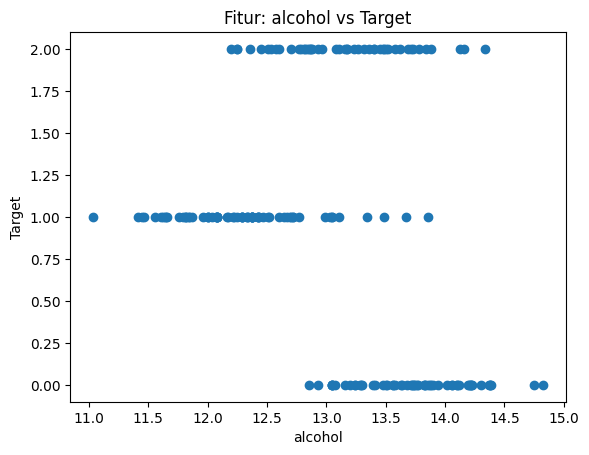

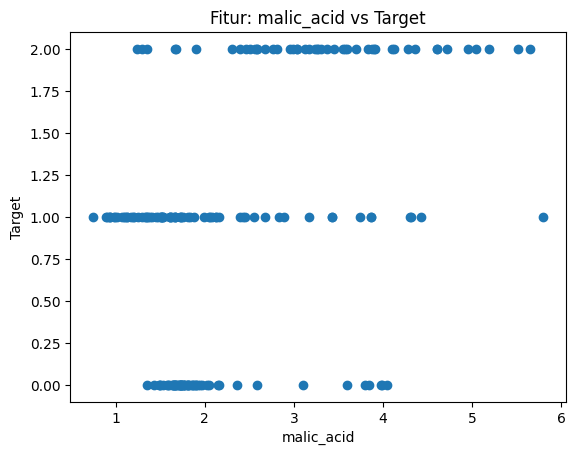

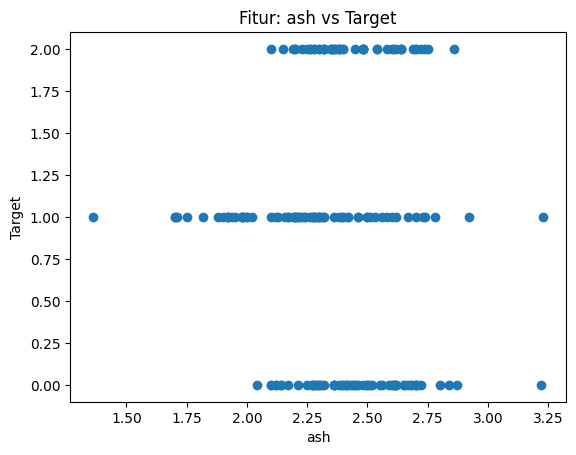

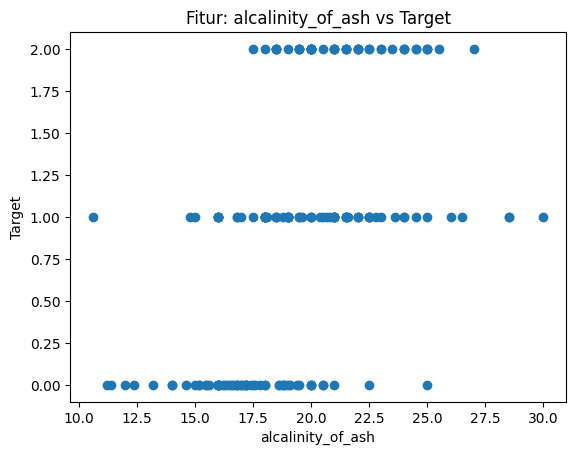

In [16]:
# Memvisualisasikan beberapa fitur
%matplotlib inline
import matplotlib.pyplot as plt
for i in range(4):
    plt.figure()
    plt.scatter(df.iloc[:, i], df['target'])
    plt.xlabel(wine.feature_names[i])
    plt.ylabel('Target')
    plt.title(f'Fitur: {wine.feature_names[i]} vs Target')

In [17]:
# Memisahkan data menjadi fitur (X) dan target (y)
X = df.drop('target', axis='columns')
y = df['target']

In [18]:
# Membagi dataset menjadi set pelatihan dan pengujian
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
len(X_test)

36

In [20]:
from sklearn.ensemble import RandomForestClassifier
model= RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
model.score(X_test, y_test)

1.0

In [22]:
y_predicted = model.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
cm

array([[14,  0,  0],
       [ 0, 14,  0],
       [ 0,  0,  8]], dtype=int64)

Text(95.72222222222221, 0.5, 'Truth')

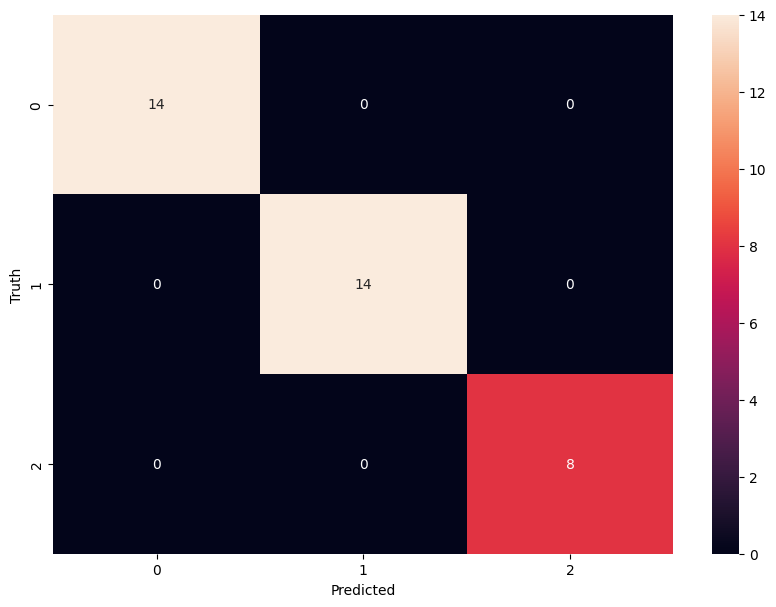

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt 
import seaborn as sn 
plt.figure(figsize=(10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')